In [1]:
from sklearn import datasets, tree, ensemble,metrics
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error

from config import config

In [2]:
dataset_train = pd.read_csv(config["random_forest"]["descriptor_filepath"],header = None, delimiter = ' ')
dataset_train = dataset_train.drop(columns = 25)
dataset_labels = pd.read_csv(config["random_forest"]["1000_scores.txt"], header = None)

In [3]:
from sklearn.model_selection import train_test_split
from random import randrange

train, test, train_labels, test_labels = train_test_split(dataset_train, dataset_labels, test_size = config["random_forest"]["test_size"])

In [4]:
y = test_labels

error = np.zeros((10, 5))
for i in range(10, 101, 10):
    for j in range(5, 26, 5):
        regr = ensemble.BaggingRegressor(n_estimators = config["random_forest"]["regressor"]["n_estimators"], max_samples = i/100 ,max_features = j)
        regr.fit(train, train_labels.values.ravel())

        predictii = regr.predict(test)
        error[int(i / 10) - 1][int(j / 5) - 1] = mean_squared_error(y, predictii)
k=int((np.argmin(error)) / 5)
l=int((np.argmin(error)) % 5)


print(error)
print("cea mai mica eroare s-a obtinut pentru procentul de bagging: ")
print((k+1)*10)
print("si pentru un numar de dimensiuni din max 25 ales: " )
print((l+1)*5)

[[1.05546638 1.05839645 1.07396595 0.98824329 1.04526403]
 [0.85413811 0.85078266 0.82673864 0.80585235 0.82818163]
 [0.70359762 0.6749916  0.67697098 0.65590054 0.67632679]
 [0.59752141 0.55627903 0.53928538 0.54383881 0.52958517]
 [0.50409831 0.47281156 0.44025646 0.42831947 0.43841791]
 [0.38513518 0.38045351 0.3440475  0.34430267 0.37378333]
 [0.3189743  0.29275524 0.3014866  0.29014966 0.2927303 ]
 [0.29161657 0.25342784 0.23013162 0.22489654 0.23647339]
 [0.2188574  0.21419208 0.197649   0.19708574 0.19855651]
 [0.1679038  0.17890004 0.1649405  0.17637765 0.15222586]]
cea mai mica eroare s-a obtinut pentru procentul de bagging: 
100
si pentru un numar de dimensiuni din max 25 ales: 
25


In [1]:
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(y, predictii)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()


0.15291230540000084


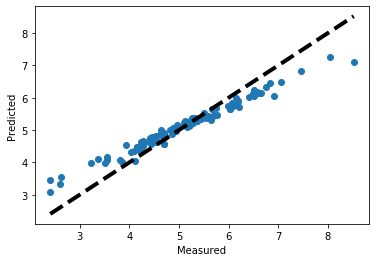

In [7]:
y = test_labels
regr = ensemble.BaggingRegressor(n_estimators = config["random_forest"]["regressor"]["n_estimators"],
                                 max_samples = config["random_forest"]["regressor"]["max_samples"],
                                 max_features = config["random_forest"]["regressor"]["max_features"])
regr.fit(train, train_labels.values.ravel())
predictii = regr.predict(test)
print( mean_squared_error(y, predictii))
fig, ax = plt.subplots()
ax.scatter(y, predictii)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()
